[array([10,  1]), array([ 8.18181818, -0.81818182]), array([6.6942149 , 0.66942147]), array([ 5.4770849 , -0.54770849]), array([4.48125127, 0.44812514]), array([ 3.66647834, -0.36664781]), array([2.99984588, 0.29998461]), array([ 2.4544194 , -0.24544191]), array([2.00816128, 0.20081615]), array([ 1.64304109, -0.16430408]), array([1.34430631, 0.13443065])]


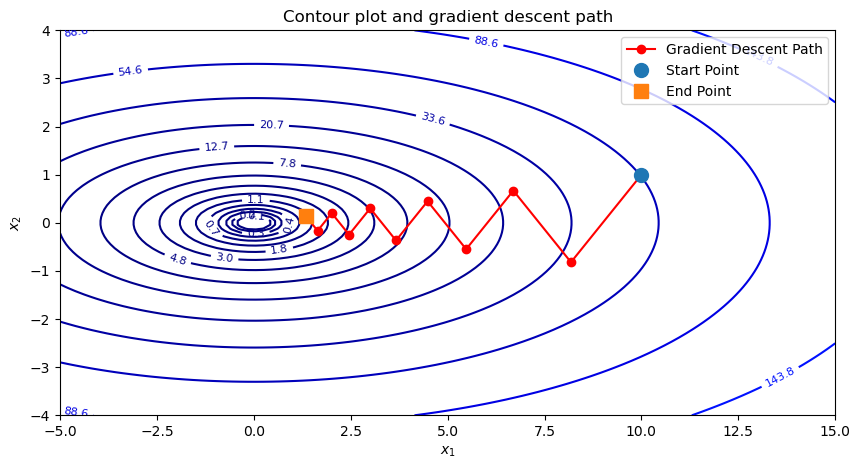

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize_scalar

# 定义函数
def f(x):
    return 0.5 * (x[0]**2 + 10 * x[1]**2)

# 定义梯度
def grad_f(x):
    return np.array([x[0], 10 * x[1]])

# 精确线搜索函数
def exact_line_search(x_k, grad):
    # 定义一维优化的目标函数
    def objective(t):
        return f(x_k - t * grad)
    
    # 使用scipy的minimize_scalar函数来执行精确线搜索
    result = minimize_scalar(objective)
    return result.x

# 初始化迭代
x_k = np.array([10, 1])  # 初始点
iterations = [x_k]  # 存储迭代结果
max_i = 10  # 迭代次数

# 进行迭代
for _ in range(max_i):
    # 计算当前点的梯度
    grad = grad_f(x_k)
    
    # 使用精确线搜索找到最佳步长
    t = exact_line_search(x_k, grad)
    
    # 更新当前点
    x_k = x_k - t * grad
    
    # 存储迭代结果
    iterations.append(x_k)

print(iterations)



# 生成 x1 和 x2 的值
x1 = np.linspace(-5, 15, 100)
x2 = np.linspace(-4, 4, 100)
x1, x2 = np.meshgrid(x1, x2)
z = f([x1, x2])
# 绘制等高线
plt.figure(figsize=(10, 5))
contours = plt.contour(x1, x2, z, levels=np.logspace(-1, 3, 20), cmap='jet')
plt.clabel(contours, inline=True, fontsize=8)

# 绘制梯度下降路径
# 将迭代结果转换为 NumPy 数组方便绘制
iterations_np = np.array(iterations)
plt.plot(iterations_np[:, 0], iterations_np[:, 1], 'o-', color='red', label='Gradient Descent Path')
plt.plot(iterations_np[0, 0], iterations_np[0, 1], 'o', markersize=10, label='Start Point')
plt.plot(iterations_np[-1, 0], iterations_np[-1, 1], 's', markersize=10, label='End Point')

# 标注和显示图形
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper right')  # 确保图例在适当位置
plt.title('Contour plot and gradient descent path')
plt.show()
